In [28]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [4]:
raw_data=pd.read_csv('Bank.csv')

In [5]:
raw_data.head()

,Unnamed: 0,duration,y
0,0,117,no
1,1,274,yes
2,2,167,no
3,3,686,yes
4,4,157,no


In [8]:
data=raw_data.copy()
data=data.drop('Unnamed: 0',axis=1)

In [9]:
data

,duration,y
0,117,no
1,274,yes
2,167,no
3,686,yes
4,157,no
...,...,...
513,204,no
514,806,yes
515,290,no
516,473,yes


In [10]:
data['y']=data['y'].map({'no':0,'yes':1})

In [11]:
data

,duration,y
0,117,0
1,274,1
2,167,0
3,686,1
4,157,0
...,...,...
513,204,0
514,806,1
515,290,0
516,473,1


In [13]:
x1=data['duration']
y=data['y']

In [16]:
x=sm.add_constant(x1)
reg_log=sm.Logit(y,x)
results_log=reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Tue, 31 Mar 2020   Pseudo R-squ.:                  0.2121
Time:                        22:52:02   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

Text(0, 0.5, 'Yes/No')

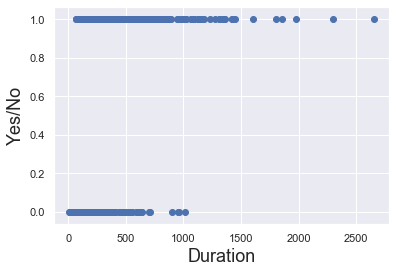

In [20]:
plt.scatter(x1,y)
plt.xlabel('Duration',size=18)
plt.ylabel('Yes/No',size=18)

In [21]:
np.exp(0.0051)

1.005113027136717

In [22]:
def f(x,b0,b1):
    return np.array(np.exp(b0+(x*b1))/(1+(np.exp(b0+(b1*x)))))


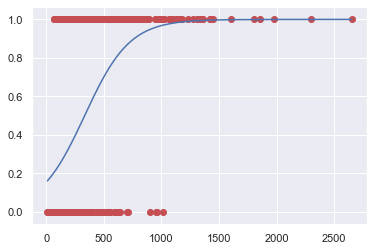

In [25]:
f_sorted=np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted=np.sort(np.array(x1))
plt.scatter(x1,y,color='C3')
plt.plot(x_sorted,f_sorted)

In [31]:
results_log.predict()

array([0.24936904, 0.42571348, 0.30019503, 0.85898342, 0.28956627,
       0.2580803 , 0.21914028, 0.16614452, 0.86976608, 0.31987434,
       0.55276776, 0.22532533, 0.30234734, 0.39480294, 0.35411888,
       0.489064  , 0.29167414, 0.25225084, 0.50567672, 0.82802726,
       0.84413091, 0.5890681 , 0.45848474, 0.40215497, 0.44961416,
       0.20546539, 0.4157464 , 0.42321571, 0.58286683, 0.2580803 ,
       0.17928751, 0.2580803 , 0.85711543, 0.43322907, 0.293791  ,
       0.32658401, 0.98373368, 0.21652721, 0.99665611, 0.62920727,
       0.2639969 , 0.49417474, 0.30885632, 0.27711089, 0.28746746,
       0.2474601 , 0.19643708, 0.30342677, 0.30559213, 0.4712014 ,
       0.87376626, 0.20132396, 0.22177596, 0.28642146, 0.25612742,
       0.49417474, 0.27916371, 0.20214723, 0.88872861, 0.53501481,
       0.23806331, 0.24556099, 0.90211616, 0.40092648, 0.51078751,
       0.45975425, 0.28019361, 0.30450837, 0.87432905, 0.23713725,
       0.18231618, 0.3706541 , 0.4724754 , 0.38144917, 0.54009

In [27]:
results_log.pred_table()

array([[204.,  55.],
       [104., 155.]])

In [28]:
cm_df=pd.DataFrame(results_log.pred_table())
cm_df.columns=['Predicted 0','Predicted 1']
cm_df=cm_df.rename(index={0:'Actual 0',1:'Actual 1'})

In [29]:
cm_df

,Predicted 0,Predicted 1
Actual 0,204.0,55.0
Actual 1,104.0,155.0


In [2]:
raw_data=pd.read_csv('Bank_data.csv')

In [3]:
raw_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [4]:
raw_data.describe()


,Unnamed: 0,interest_rate,credit,march,may,previous,duration
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,258.500000,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606
std,149.677988,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990
min,0.000000,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,129.250000,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000
50%,258.500000,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000
75%,387.750000,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000
max,517.000000,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000


In [5]:
data=raw_data.copy()

In [6]:
data=data.drop('Unnamed: 0',axis=1)

In [8]:
data['y']=data['y'].map({'yes':1,'no':0})

In [9]:
data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,0.877,0.0,0.0,5.0,1.0,473.0,1


In [10]:
y=data['y']
x1=data['duration']

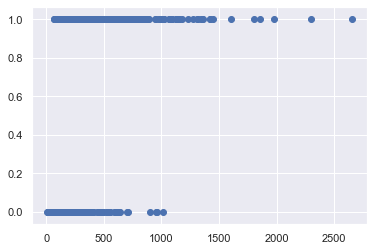

In [11]:
plt.scatter(x1,y)

In [13]:
x=sm.add_constant(x1)
reg_log=sm.Logit(y,x)
results_log=reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [14]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Wed, 01 Apr 2020   Pseudo R-squ.:                  0.2121
Time:                        15:00:33   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

In [15]:
estimators=['interest_rate','credit','march','previous','duration']

In [16]:
x1_all=data[estimators]

In [18]:
x_all=sm.add_constant(x1_all)
reg_logit=sm.Logit(y,x_all)
results_logit=reg_logit.fit()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


In [20]:
results_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Wed, 01 Apr 2020   Pseudo R-squ.:                  0.5143
Time:                        15:03:03   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0211      0.311     -0.068      0.946      -0.631       0.589
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
credit            2.3585      1.088      2.169      0.030       0.227       4.490
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
previous          1.5363      0.501      3.067      0.002       0.554       2.518
duration          0.0070      0.001      9.381      0.000       0.006       0.008
=================================================================================
"""

In [51]:
def confusion_matrix(data,actual_values,model):
    pred_values=model.predict(data)
    bins=np.array([0,0.5,1])
    cm=np.histogram2d(actual_values,pred_values,bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return cm,accuracy

In [52]:
confusion_matrix(x_all,y,results_logit)

(array([[218.,  41.],
        [ 30., 229.]]), 0.862934362934363)

In [53]:
raw_data2 = pd.read_csv('Bank_Data_Test.csv')
data_test = raw_data2.copy()

In [54]:
data_test=data_test.drop('Unnamed: 0',axis=1)

In [55]:
data_test['y']=data_test['y'].map({'no':0,'yes':1})

In [56]:
data_test

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0
...,...,...,...,...,...,...,...
217,4.963,0.0,0.0,0.0,0.0,458.0,1
218,1.264,0.0,1.0,1.0,0.0,397.0,1
219,1.281,0.0,1.0,0.0,0.0,34.0,0
220,0.739,0.0,0.0,2.0,0.0,233.0,0


In [57]:
y_test=data_test['y']
x1_test=data_test[estimators]

In [58]:
x_test=sm.add_constant(x1_test)

In [59]:
confusion_matrix(x_test,y_test,results_logit)

(array([[93., 18.],
        [13., 98.]]), 0.8603603603603603)

In [60]:
confusion_matrix(x_all,y,results_logit)

(array([[218.,  41.],
        [ 30., 229.]]), 0.862934362934363)